# trim_floating_solid
an example for the use of porespy.filters.trim_floating_solid

Removes all solid that isn't connected to the edge of the image.

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import scipy
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

In [2]:
im2d = np.zeros([300, 300])
im2d = ps.generators.RSA(im2d, radius=10, volume_fraction=0.7)
im2d = im2d < 0.5

--------------------------------------------------------------------------------
RSA: Adding spheres of size 10
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Regenerating free_sites after 118 iterations
Regenerating free_sites after 148 iterations
Number of spheres inserted: 151
Final volume fraction: 0.5117222222222222


In [3]:
dist = scipy.stats.norm(loc=20, scale=10)
im3d = ps.generators.polydisperse_spheres([300,300,300], 0.9, dist, 2, 10)
#im3d = im3d < 0.5

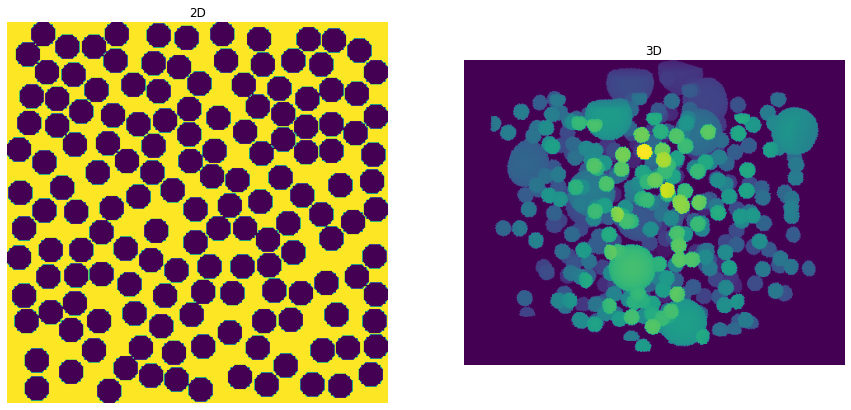

In [4]:
im3dvis = ps.visualization.show_3D(im3d)
fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(im2d);
ax[1].imshow(im3dvis);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('2D')
ax[1].set_title('3D')

#default values:
conn = None

## Apply filter function:
With different parameters

### 2D
Conn options are 4 or 8 for 2D images.

Text(0.5, 1.0, 'conn = 4')

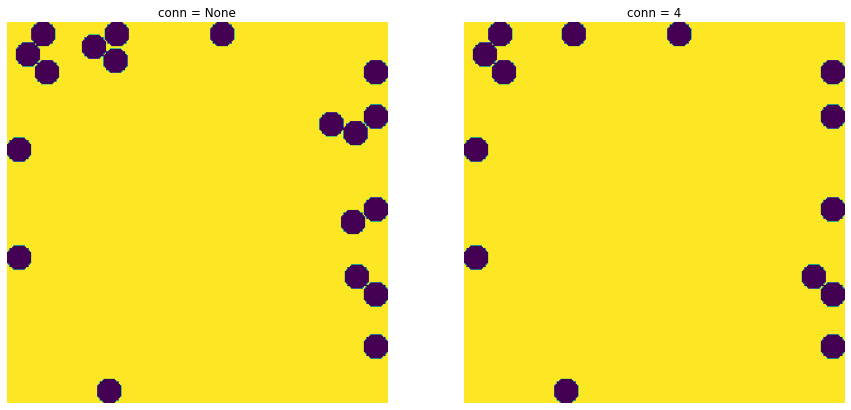

In [5]:
x = ps.filters.trim_floating_solid(im2d, conn)
xx = ps.filters.trim_floating_solid(im2d, 4)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('conn = None')
ax[1].set_title('conn = 4')

### 3D
Conn options are 6 and 26 for 3D options.

Text(0.5, 1.0, 'conn = 6')

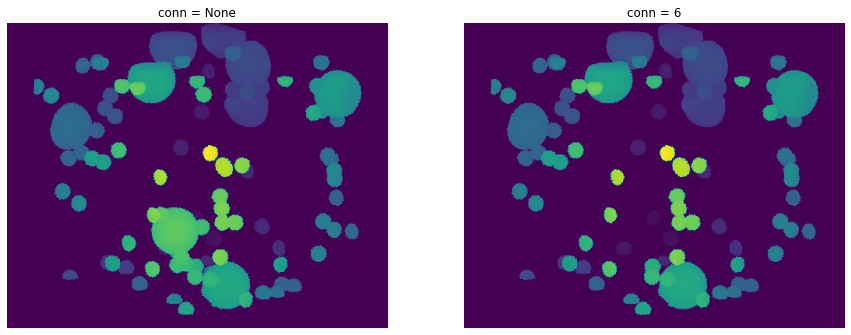

In [6]:
x = ps.filters.trim_floating_solid(im3d, conn)
xx = ps.filters.trim_floating_solid(im3d, 6)

x3d = ps.visualization.show_3D(x)
xx3d = ps.visualization.show_3D(xx)
fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x3d);
ax[1].imshow(xx3d);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('conn = None')
ax[1].set_title('conn = 6')